In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # visulaizing data
%matplotlib inline
import seaborn as sns

In [44]:
df = pd.read_csv('retail_store_sales.csv' , encoding = 'unicode_escape')
#to avoid encoding error , use 'unicode_escape'

In [45]:
df.shape #how many columns and rows in file it checks

(12575, 11)

In [46]:
df.head()
#used to show top 5 rows

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [47]:
df.info

<bound method DataFrame.info of       Transaction ID Customer ID       Category          Item  Price Per Unit  \
0        TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1        TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2        TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3        TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4        TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   
...              ...         ...            ...           ...             ...   
12570    TXN_9347481     CUST_18     Patisserie   Item_23_PAT            38.0   
12571    TXN_4009414     CUST_03      Beverages    Item_2_BEV             6.5   
12572    TXN_5306010     CUST_11       Butchers    Item_7_BUT            14.0   
12573    TXN_5167298     CUST_04      Furniture    Item_7_FUR            14.0   
12574    TXN_2407494     CUST_23           Food   Item_9_FOOD            17.0

In [48]:
pd.isnull(df)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,False,False,False,False,False,False,False,False,False,False,True
12571,False,False,False,False,False,False,False,False,False,False,False
12572,False,False,False,False,False,False,False,False,False,False,True
12573,False,False,False,False,False,False,False,False,False,False,False


In [49]:
pd.isnull(df).sum()#check for null values

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [50]:
df.shape

(12575, 11)

In [51]:
df.dropna(inplace=True)

In [52]:
df.shape

(7579, 11)

In [53]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [56]:
print(df.describe())

       Price Per Unit     Quantity  Total Spent
count     7579.000000  7579.000000  7579.000000
mean        23.428882     5.557329   130.427893
std         10.704121     2.843546    94.378663
min          5.000000     1.000000     5.000000
25%         14.000000     3.000000    52.000000
50%         23.000000     6.000000   110.000000
75%         33.500000     8.000000   192.000000
max         41.000000    10.000000   410.000000


In [57]:
sales_by_category = df.groupby("Category")["Total Spent"].sum()
print(sales_by_category)

Category
Beverages                             124513.0
Butchers                              136146.5
Computers and electric accessories    126621.5
Electric household essentials         124381.5
Food                                  122434.5
Furniture                             120756.5
Milk Products                         116538.5
Patisserie                            117121.0
Name: Total Spent, dtype: float64


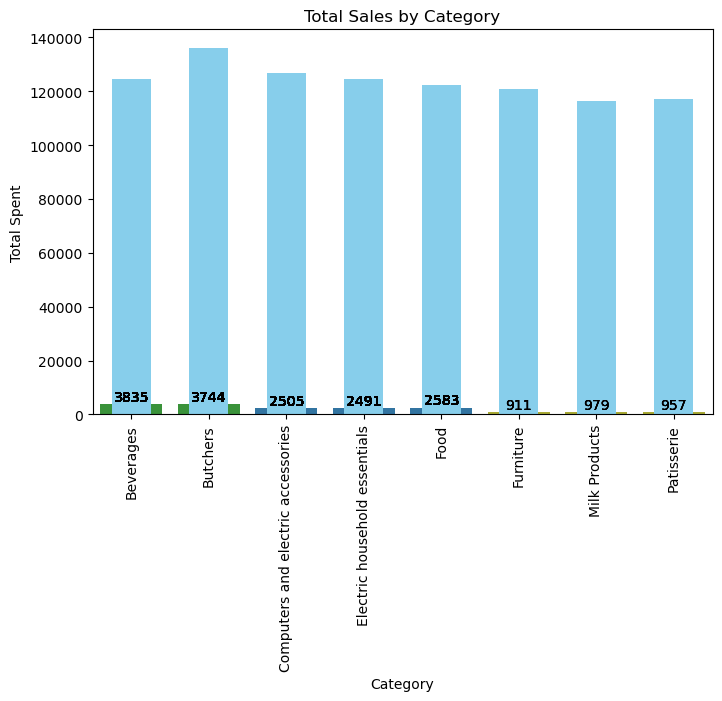

In [58]:
sales_by_category.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Total Spent")
plt.xlabel("Category")
plt.show()


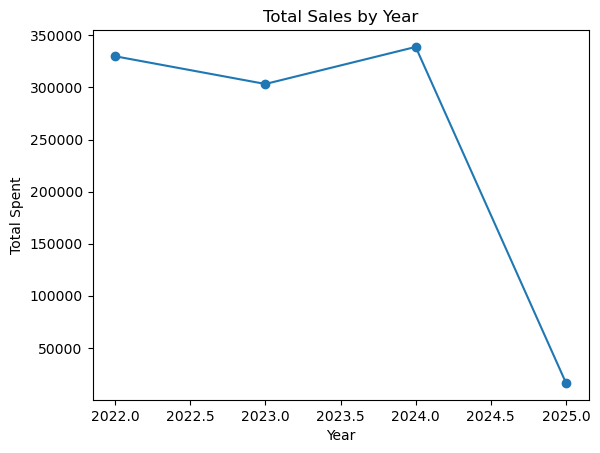

In [59]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
df["Year"] = df["Transaction Date"].dt.year

sales_by_year = df.groupby("Year")["Total Spent"].sum()
sales_by_year.plot(kind='line', marker='o')
plt.title("Total Sales by Year")
plt.ylabel("Total Spent")
plt.show()


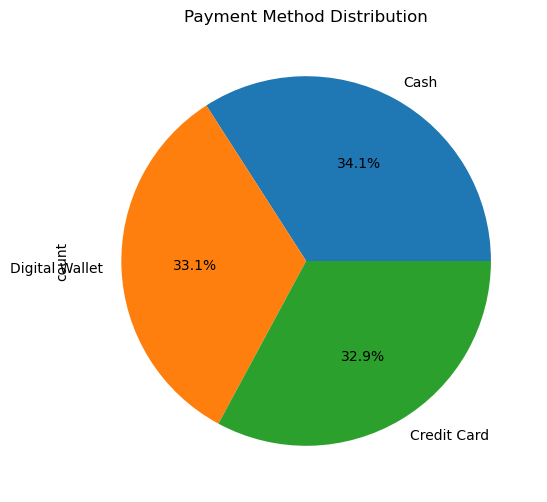

In [60]:
payment_counts = df["Payment Method"].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Payment Method Distribution")
plt.show()
